<a href="https://colab.research.google.com/github/AnantaApril/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/April_Aeschbacher_LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [0]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Plot style defaults to fast
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [6]:
# Read in titanic dataset
url = 'https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/titanic.csv'
titanic_info = pd.read_csv(url)
titanic_info.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,Southampton
1,1,1,female,38.0,71.2833,Cherbourg
2,1,3,female,26.0,7.9250,Southampton
3,1,1,female,35.0,53.1000,Southampton
4,0,3,male,35.0,8.0500,Southampton


In [7]:
# Start categorizing cabin class
titanic_info['cabin_class'] = titanic_info['Pclass'].map({1:'first', 2:'second', 3:'third'})
titanic_info.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,cabin_class
0,0,3,male,22.0,7.2500,Southampton,third
1,1,1,female,38.0,71.2833,Cherbourg,first
2,1,3,female,26.0,7.9250,Southampton,third
3,1,1,female,35.0,53.1000,Southampton,first
4,0,3,male,35.0,8.0500,Southampton,third


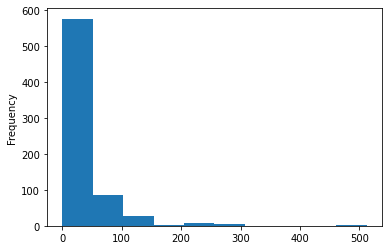

In [8]:
# Fare is a continuous variable, so we can display it with a histogram.
titanic_info['Fare'].plot(kind = 'hist');

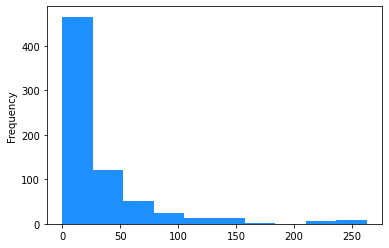

In [9]:
#Remove two extreme outliers
titanic_info = titanic_info[titanic_info['Fare']<500]
titanic_info['Fare'].plot(kind = 'hist', color = 'dodgerblue');

In [10]:
# A continuous variable can be converted to a categorical var using binning
farebins = [0, 8, 15, 33, 512]
farelabels = ['low', 'medium', 'high', 'vhigh']
titanic_info['fare_groups'] = pd.cut(titanic_info['Fare'], bins = farebins, labels = farelabels)
myresults = titanic_info['fare_groups'].value_counts().sort_index()
myresults

low       154
medium    189
high      185
vhigh     174
Name: fare_groups, dtype: int64

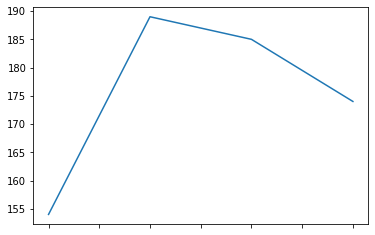

In [11]:
# Sometimes it's important to specify the range of your y-axis to get more accurate results
# Not spedified
myresults.plot();

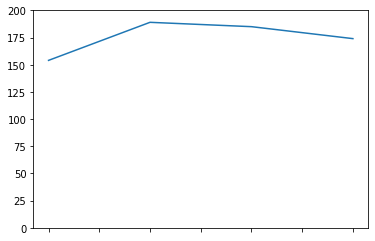

In [12]:
# Specific range
myresults.plot(ylim = (0,200));

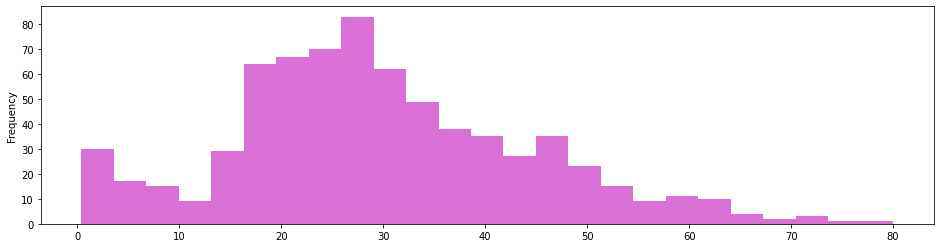

In [14]:
# Display a single continuous variable
# Histogram
titanic_info['Age'].plot(kind = 'hist', bins = 25, figsize = (16, 4), color = 'orchid')

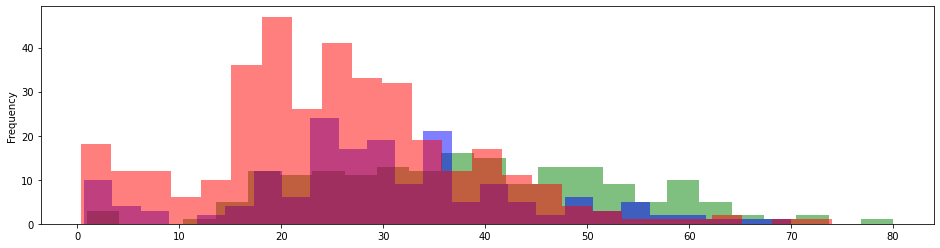

In [16]:
# Stacked histogram of continuous variable, broken out by categorical variable
titanic_info[titanic_info['Pclass']==1]['Age'].plot(kind = 'hist', bins = 25, figsize = (16, 4), color = 'green', alpha = 0.5)
titanic_info[titanic_info['Pclass']==2]['Age'].plot(kind = 'hist', bins = 25, figsize = (16, 4), color = 'blue', alpha = 0.5)
titanic_info[titanic_info['Pclass']==3]['Age'].plot(kind = 'hist', bins = 25, figsize = (16, 4), color = 'red', alpha = 0.5);

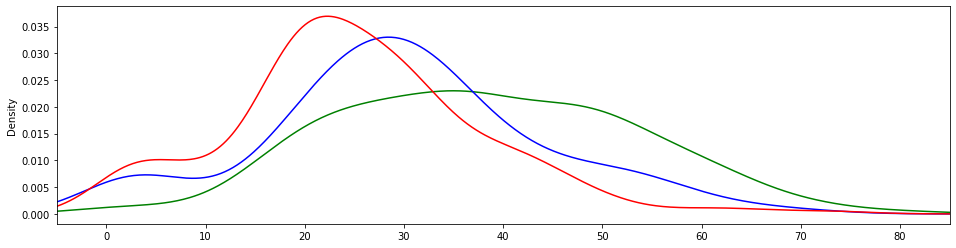

In [17]:
# But this easier to read using a Kernel Density Estimate (KDE). Note the use of xlim
titanic_info[titanic_info['Pclass']==1]['Age'].plot(kind = 'density', xlim = (-5, 85), figsize = (16, 4), color = 'green')
titanic_info[titanic_info['Pclass']==2]['Age'].plot(kind = 'density', xlim = (-5, 85), figsize = (16, 4), color = 'blue')
titanic_info[titanic_info['Pclass']==3]['Age'].plot(kind = 'density', xlim = (-5, 85), figsize = (16, 4), color = 'red');

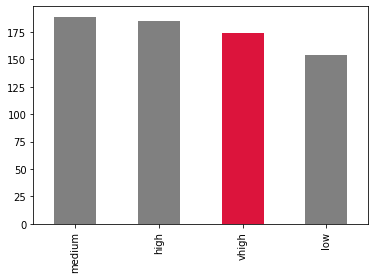

In [18]:
# Bar chart. Use colors to make a particular value 'pop'!
titanic_info['fare_groups'].value_counts().plot(kind = 'bar', color = ['gray', 'gray', 'crimson', 'gray']);

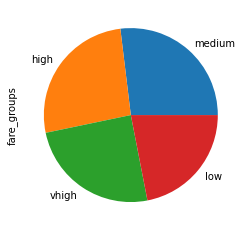

In [19]:
# Pie chart
titanic_info['fare_groups'].value_counts().plot(kind='pie', figsize=(4,4));

In [20]:
# Compare two categorical variables using crosstab
cab_death = pd.crosstab(titanic_info['cabin_class'], titanic_info['Survived'])
cab_death

Survived,0,1
cabin_class,,
first,64,117
second,90,83
third,270,85


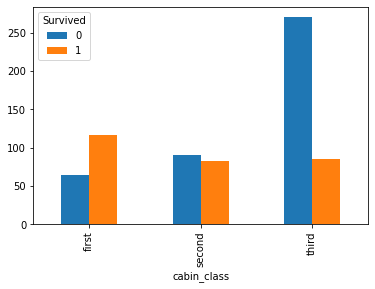

In [21]:
# Bar chart
cab_death.plot(kind = 'bar');

In [22]:
# Crosstab with column percents
cab_death1 = pd.crosstab(titanic_info['cabin_class'], titanic_info['Survived'], normalize = 'columns')
cab_death1

Survived,0,1
cabin_class,,
first,0.150943,0.410526
second,0.212264,0.291228
third,0.636792,0.298246


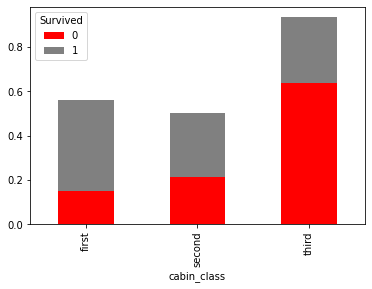

In [25]:
# Make a stacked bar chart for easy comparison of two variables
cab_death1.plot(kind='bar', stacked=True, color=['red', 'gray']);

In [26]:
# Crosstab with column percents.
cab_death2 = pd.crosstab(titanic_info['cabin_class'],titanic_info['Survived'], normalize='index')
cab_death2

Survived,0,1
cabin_class,,
first,0.353591,0.646409
second,0.520231,0.479769
third,0.760563,0.239437


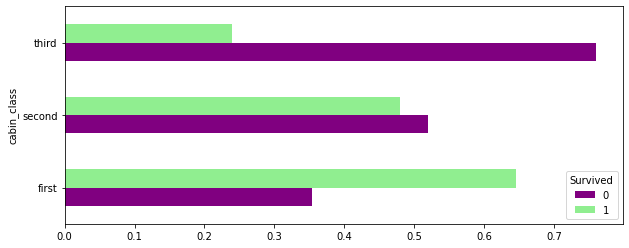

In [27]:
# A paired barchart for comparison of two categorical variables. Note the use of 'barh'.
cab_death2.plot(kind = 'barh', color = ['purple', 'lightgreen'], figsize = (10,4));

In [28]:
# Let's look at a single continuous variable
titanic_info['Age'].mean()

29.618011283497882

In [35]:
# Now explore that continuous variable broken out by a categorical (i.e., categorical) variable.
cab_age = titanic_info.groupby('cabin_class')['Age'].mean()
cab_age

cabin_class
first     38.151492
second    29.877630
third     25.140620
Name: Age, dtype: float64

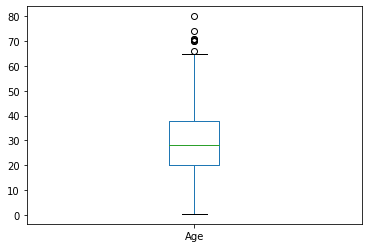

In [36]:
# To visualize a single continuous variable, you can just use `.plot` with `kind=box`
titanic_info['Age'].plot(kind = 'box');

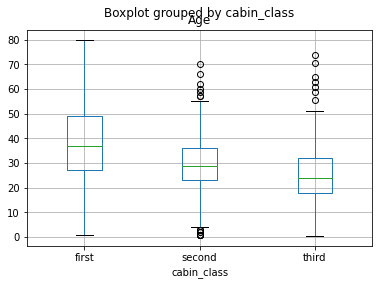

In [37]:
# But to break out a continuous variable by a categorical variable, use `.boxplot`
titanic_info.boxplot(column = 'Age', by = 'cabin_class');

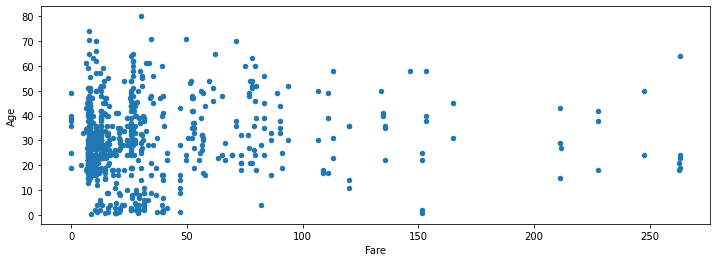

In [38]:
# Two continuous variables: age by fare
titanic_info.plot(kind = 'scatter', x = 'Fare', y = 'Age', figsize = (12,4));

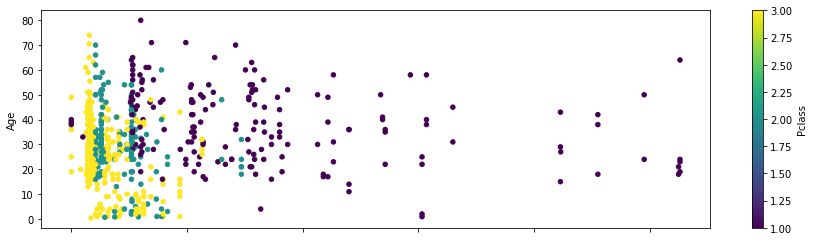

In [41]:
# Three variables: age, fare, and cabin class (color can be either continuous or categorical here).
titanic_info.plot(kind = 'scatter', x='Fare', y='Age', c='Pclass', colormap='viridis', figsize=(15,4));

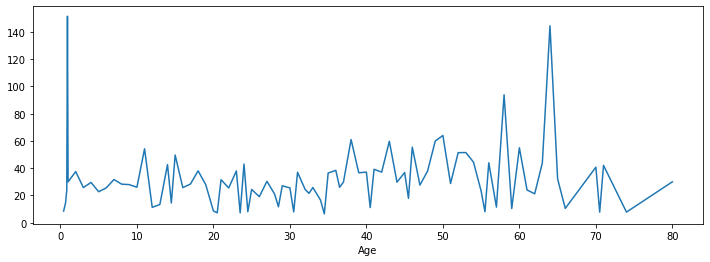

In [42]:
# line chart: age by fare
titanic_info.groupby('Age')['Fare'].mean().plot(figsize=(12,4));

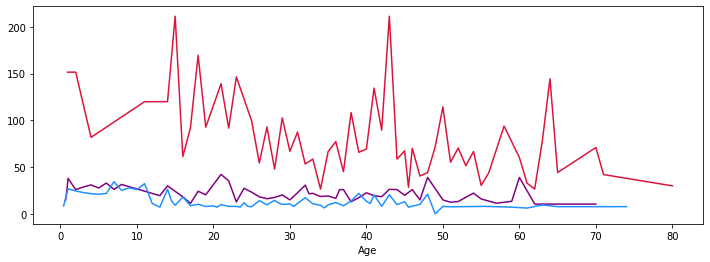

In [45]:
# Line chart: age by fare and cabin class
mycolors=['crimson', 'purple', 'dodgerblue']
# Rather than specifying 3 plots (as we did above, with the histogram) you can just loop through the values.
for x in [1,2,3]:
    titanic_info[titanic_info['Pclass']==x].groupby('Age')['Fare'].mean().plot(figsize=(12,4), color=mycolors[x-1])

In [46]:
# Compare multiple continuous variables
# Correlation Matrix
corr_matrix = titanic_info.corr()
corr_matrix

,Survived,Pclass,Age,Fare
Survived,1.000000,-0.351579,-0.084756,0.272376
Pclass,-0.351579,1.000000,-0.365259,-0.616062
Age,-0.084756,-0.365259,1.000000,0.096573
Fare,0.272376,-0.616062,0.096573,1.000000


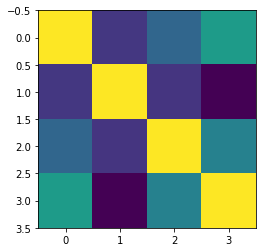

In [47]:
# Display the correlation matrix as a heatmap
plt.imshow(corr_matrix);

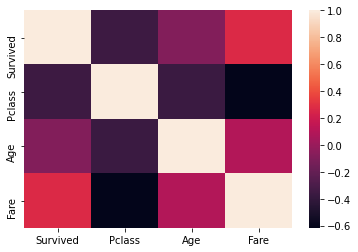

In [48]:
# But this actually is easier and better looking if you use seaborn code.
sns.heatmap(corr_matrix);

In [0]:
# Intro to matplotlib
import numpy as np
x = np.linspace(0, 5, 11)
y = x ** 2

In [50]:
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [51]:
y

array([ 0.  ,  0.25,  1.  ,  2.25,  4.  ,  6.25,  9.  , 12.25, 16.  ,
       20.25, 25.  ])

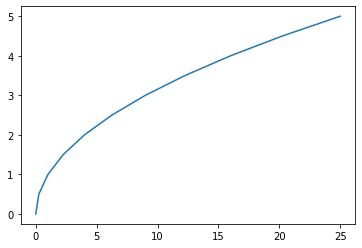

In [53]:
# a very simple plot, to get started. Notice that NO PANDAS is required!
plt.plot(y,x);

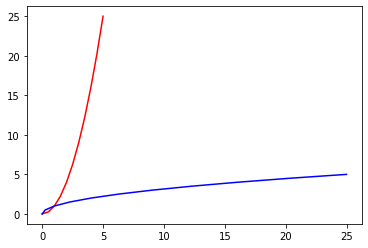

In [54]:
# You can have two 'plt' plots together (and let's add some color).
plt.plot(x, y, 'r') 
plt.plot(y, x, 'b');

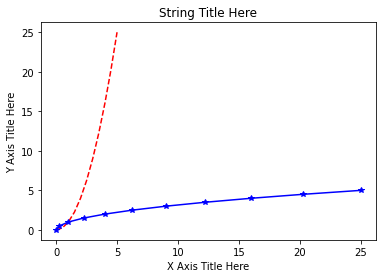

In [55]:
# Now add some labels, plus a little texture.
plt.plot(x, y, 'r--') 
plt.plot(y, x, 'b*-')
plt.xlabel('X Axis Title Here')
plt.ylabel('Y Axis Title Here')
plt.title('String Title Here');

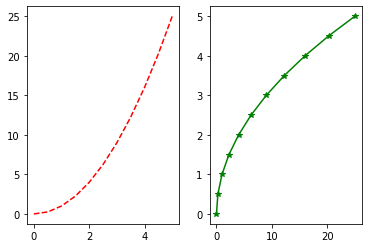

In [57]:
# The basic syntax goes like this: plt.subplot(nrows, ncols, plot_number)
plt.subplot(1,2,1)
plt.plot(x, y, 'r--')
plt.subplot(1,2,2)
plt.plot(y, x, 'g*-');

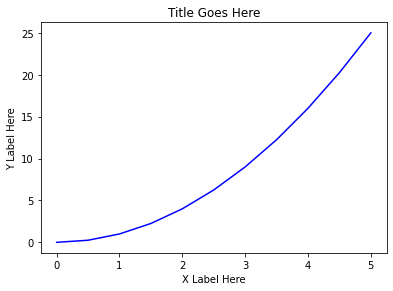

In [60]:
# The .figure() method
# To begin we create a figure instance. Then we can add axes to that figure:
# Create Figure (empty canvas)
fig = plt.figure()

# Add set of axes to figure
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

# Plot on that set of axes
axes.plot(x, y , 'b')
axes.set_xlabel('X Label Here')
axes.set_ylabel('Y Label Here')
axes.set_title('Title Goes Here');

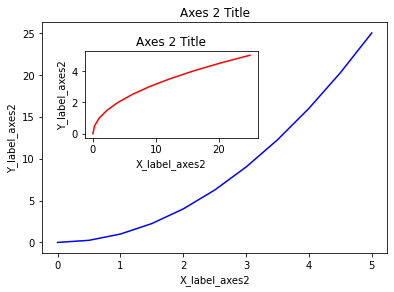

In [61]:
# Creates blank canvas
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes

# Larger Figure Axes 1
axes1.plot(x, y, 'b')
axes1.set_xlabel('X_label_axes2')
axes1.set_ylabel('Y_label_axes2')
axes1.set_title('Axes 2 Title')

# Insert Figure Axes 2
axes2.plot(y, x, 'r')
axes2.set_xlabel('X_label_axes2')
axes2.set_ylabel('Y_label_axes2')
axes2.set_title('Axes 2 Title');

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [65]:
import pandas as pd
import seaborn as sns
import numpy as np



url = 'https://github.com/fivethirtyeight/data/blob/master/thanksgiving-2015/thanksgiving-2015-poll-data.csv'

thanks_table = pd.read_csv(url)

# thanks_table.head()

ParserError: ignored